In [9]:
import pandas as pd
from src.models import MyModel
from src.processing import process_features
from src.evaluation import evaluate

%load_ext autoreload
%autoreload 2

model = MyModel()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
x_train = pd.read_csv("data/x_train.csv", index_col= 'DELIVERY_START', parse_dates=True)
y_train = pd.read_csv("data/y_train.csv", index_col= 'DELIVERY_START', parse_dates=True)
x_test = pd.read_csv("data/x_test.csv", index_col= 'DELIVERY_START', parse_dates=True)

proc_x_train, proc_x_test = process_features(x_train,x_test)
model.fit(proc_x_train, y_train);

## Evaluation

1062.5647


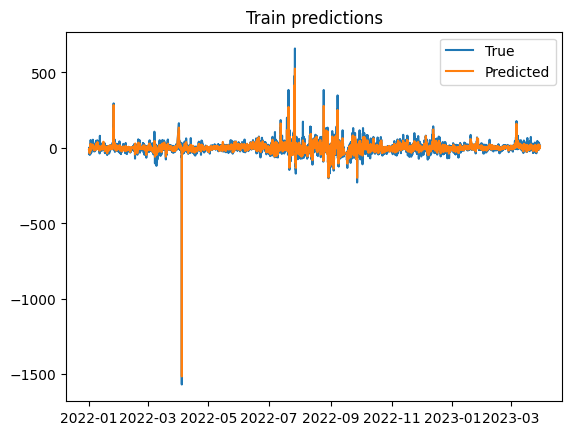

In [11]:
# Split data
from sklearn.model_selection import train_test_split
x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(proc_x_train, y_train, test_size=0.2, random_state=42)

# Train model
model.fit(x_train_eval, y_train_eval)

# Evaluate model
print(evaluate(model, x_test_eval, y_test_eval))

# Visualize predictions
import matplotlib.pyplot as plt
y_train_pred = model.predict(proc_x_train)
y_test_pred = model.predict(proc_x_test)


# Plot predictions
plt.plot(y_train.index, y_train, label='True')
plt.plot(y_train.index, y_train_pred, label='Predicted')
plt.title('Train predictions')
plt.legend()
plt.show()


## Prepare submission

In [12]:
model_name = "XgBoost"
parameters = ""

In [13]:
from datetime import datetime
y_test_pred = model.predict(proc_x_test)
y_test_pred = pd.DataFrame(y_test_pred, index=x_test.index, columns=['spot_id_delta'])
y_test_pred.to_csv(f'submission/{datetime.today().date()}_{model_name}_{parameters}.csv', index=True)